# Assignment 3

- Go back to Lab assignment 2 and improve the LR result based on the extensions of LR
- Classify the weakest link based on the 38 predictors of a movement using a few classification variants(different models or model parameterizations)
- Select an accuracy metric
- Test and iteratively improve the accuracy of the variants

## Imports

In [81]:
import sys

sys.path.append("../../scripts")

import dagshub
import mlflow
import ML_utils as MLUtils

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier





## Setup

In [82]:
# Setup dagshub and MLFlow

dagshub.init(repo_owner="SamuelFredricBerg", repo_name="4dt907", mlflow=True)
utils = MLUtils.MLUtils("Project_Model_A3")

# Configs
config = {
    "data_split_seed": 42,
    "test_size": 0.2,
    "n_folds": 5,
    "shuffle": True,
    "variant": "BaselineA3",
}
#    "n_estimators": 100,
#    "max_depth": 7,
#    "min_samples_split": 5,
#}

WeakLink_data_path = "../../data/AimoScore_WeakLink_big_scores_A3.csv"
Scores_data_path = "../../data/scores_and_weak_links_A3.csv"

dfw = pd.read_csv(WeakLink_data_path)
dfs = pd.read_csv(Scores_data_path)


df_final = pd.merge(dfw, dfs, on="ID")


weak_link_columns = [
    'ForwardHead', 'LeftArmFallForward', 'RightArmFallForward',
    'LeftShoulderElevation', 'RightShoulderElevation', 'ExcessiveForwardLean',
    'LeftAsymmetricalWeightShift', 'RightAsymmetricalWeightShift',
    'LeftKneeMovesInward', 'RightKneeMovesInward', 'LeftKneeMovesOutward',
    'RightKneeMovesOutward', 'LeftHeelRises', 'RightHeelRises'
]

# Create the target label
df_final['WeakestLink'] = df_final[weak_link_columns].idxmax(axis=1)


kf = KFold(
    n_splits=config["n_folds"],
    shuffle=config["shuffle"],
    random_state=config["data_split_seed"],
)

Initialized MLflow to track repo "SamuelFredricBerg/4dt907"

Repository SamuelFredricBerg/4dt907 initialized!

# Preprocessing

In [83]:
def preprocessing(df):
    df_cleaned = df
    return df_cleaned

# Training

# Plots

In [ ]:
def confuse_matrix(X, y, model):
    # 1. Train on a single split to see real predictions
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 2. Create the plot
    # 1. Define the full list of expected labels (from your earlier definition)
    all_labels = weak_link_columns 

    # 2. Create the plot with the 'labels' argument
    fig, ax = plt.subplots(figsize=(12, 10)) # Made slightly larger for 14 labels
    ConfusionMatrixDisplay.from_predictions(
        y_test, 
        y_pred, 
        ax=ax, 
        display_labels=all_labels, # Force these labels on the axes
        labels=all_labels,         # Ensure it looks for all 14
        cmap='Blues', 
        xticks_rotation=90
    )
    plt.title("Weakest Link Prediction: 14-Class Matrix")
    plt.tight_layout() # Prevents label cutoff
    plt.savefig("matrix.png")
    plt.show()

In [ ]:
def crossval_boxplots(f1_raw, acc_raw, prec_raw, rec_raw):
    # 1. Create a dictionary of the raw arrays
    raw_data = {
        'F1 Score': f1_raw,
        'Accuracy': acc_raw,
        'Precision': prec_raw,
        'Recall': rec_raw
    }
    
    # 2. Convert to 'Long Format' (This is why your plot was likely clamped)
    df_plot = pd.DataFrame(raw_data).melt(var_name='Metric', value_name='Score')
    
    # 3. Plotting
    plt.figure(figsize=(10, 6))
    
    # Setting the style to whitegrid helps readability
    sns.set_style("whitegrid")
    
    # Use 'Metric' for x and 'Score' for y
    ax = sns.boxplot(x='Metric', y='Score', data=df_plot, palette="Set3", width=0.4)
    sns.swarmplot(x='Metric', y='Score', data=df_plot, color=".25", size=7)

    # 4. Smart Scaling: Instead of 0 to 1, let's zoom in on the data 
    # but keep a little padding so we can see the whiskers
    ymin = df_plot['Score'].min() - 0.05
    ymax = df_plot['Score'].max() + 0.05
    plt.ylim(max(0, ymin), min(1, ymax)) # Ensure we don't go out of 0-1 range
    
    plt.title(f'Model Stability: {config["variant"]}\n(Zoomed in to show variance)')
    plt.ylabel('Score Value')
    
    plt.savefig("boxplot.png")
    plt.show()

## Main Code

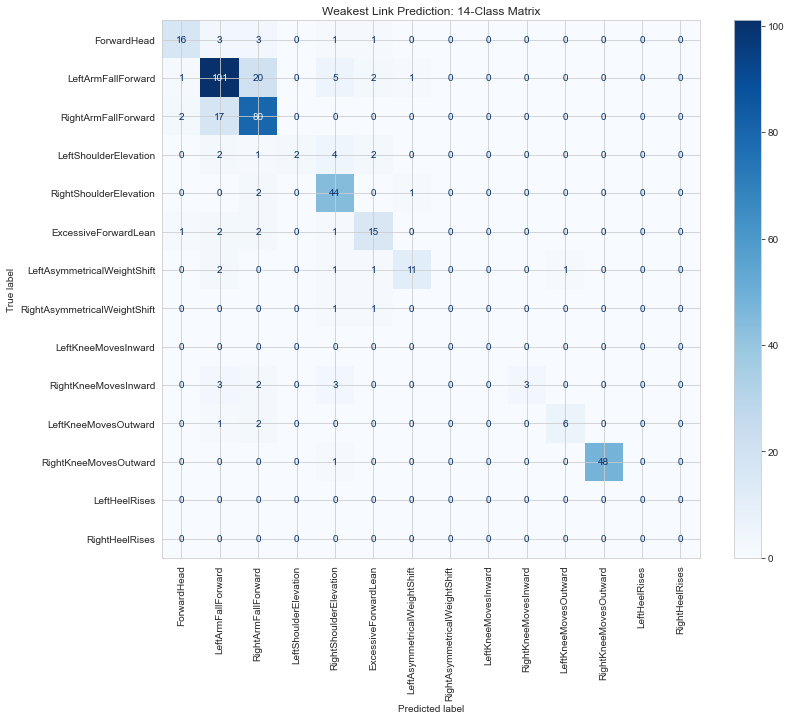

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'F1_Mean': 0.7799136233745562, 'F1_Std': 0.020238678152606944, 'Accuracy_Mean': 0.7903461191490333, 'Precision_Mean': 0.7973505420163891, 'Recall_Mean': 0.7851023740736087}


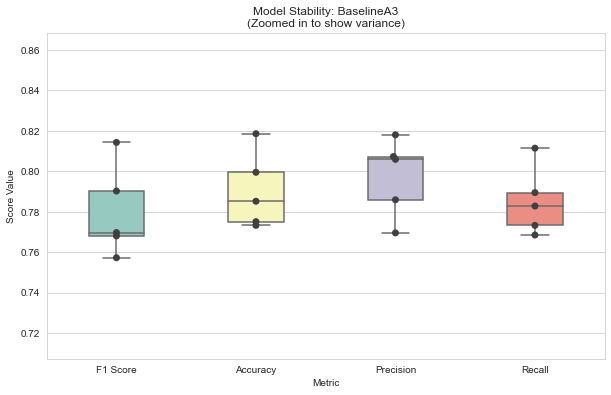

New Best! 0.7799136233745562 > -1. Updating models on DagsHub


2026/02/07 13:00:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/02/07 13:00:51 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/9w/6516vw7x2gbc3llv8dbzm6vw0000gn/T/tmpr6vwj_ox/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2026/02/07 13:00:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'Project_Model_A3' already exists. Creating a new version of this model...
2026/02/07 13:00:57 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Project_Model_A3, version 2
Created version '2' of model 'Project_Model_A3'.
/var/folders/9w/6516vw7x2gbc3llv8d

New model beat current @dev uploading to DagsHub
🏃 View run A3-Training at: https://dagshub.com/SamuelFredricBerg/4dt907.mlflow/#/experiments/0/runs/429b830eaa2b44cba698e08c20cc11ff
🧪 View experiment at: https://dagshub.com/SamuelFredricBerg/4dt907.mlflow/#/experiments/0


In [ ]:

with mlflow.start_run(run_name="A3-Training") as run:
    mlflow.log_params(config)


    y = df_final['WeakestLink']
    X = df_final.drop(['Date', 'ID' 'SCORE'], axis=1, errors='ignore')
    X = X.select_dtypes(include=[np.number])

    model = RandomForestClassifier()

    model.fit(X,y)

    confuse_matrix(X, y, model)


    f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')
    accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    precision = cross_val_score(model, X, y, cv=kf, scoring='precision_weighted')
    recall = cross_val_score(model, X, y, cv=kf, scoring='recall_weighted')

    results = {
        "F1_Mean": f1_scores.mean(),
        "F1_Std": f1_scores.std(),
        "Accuracy_Mean": accuracy.mean(),
        "Precision_Mean": precision.mean(),
        "Recall_Mean": recall.mean()
    }
    print(results)

    crossval_boxplots(f1_scores,accuracy,precision,recall)

    mlflow.log_metrics(results)

    mlflow.log_artifact("boxplot.png")
    mlflow.log_artifact("matrix.png")

    if utils.auto_check_challenger(run.info.run_id, metric_name="F1_Mean"):
        mlflow.sklearn.log_model(model, "model", registered_model_name="Project_Model_A3")
        latest_v = utils.client.get_latest_versions("Project_Model_A3")[0].version
        utils.client.set_registered_model_alias("Project_Model_A3", "dev", latest_v)
        print("New model beat current @dev uploading to DagsHub")
    else:
        print("Did not beat current @dev, model not uploaded to Dagshub")